# Introduction

The main objective in this notebook is to try to discover which group of features has more significnace in determining the cancer level by utilizing Decision Trees.

we are going to devide our features into:
- Genetic and Medical History Features
- Environmental Features
- Behavioral Features

And build decision trees of each and compare the results to determine which group of features give better results in predecting cancer levels

The idea is not to reach 100% predection accuray as a must, but to figure out more details that help to confirm the common conceptions and challange the hypothsis about lung cancer reasons.

At the end we will build a decision tree that includes all the features in general and check the predection results



Below are the selected features of each group:
- Genetic and Medical History:
  - Genetic Risk
  - Chronic Lung Disease
  - Obesity

- Environmental Features:
  - Air Pollution
  - OccuPational Hazards
  - Passive Smoker

- Behavioral Features
  - Alcohol use
  - Balanced Diet
  - Smoking

# Basic Libraries Import

In [16]:
# Common imports
import numpy as np
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Load Dataset and explore

In [23]:
#read cancer patient data sets.csv from personal google drive directory and publicly shared
patientsDf=pd.read_csv('https://drive.google.com/uc?id=1-IPjL7WS4lXgYWL7mnmykZ_Z_rvKcolL')

# patientsDf=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/cancer patient data sets.csv')
# original data downloaded from https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link

https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link

In [24]:
patientsDf.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


Each row represents a patient

In [25]:
patientsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

No missing data found
All attributes Are Numerical (Ordinal in logic) except Patient Id and Level (which can be considered Ordinal i.e. High, Medium and Low), Age is the only true Numerical Feature excluding the index feature

In [26]:
patientsDf.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


You can see that the Categorical features have different scale.
For example:
Air Polution (1 min - 8 max) while
Genetic Risk (1 min - 7 max) while
Fatigue (1 min - 9 max) and so on.

In [27]:
patientsDf["Level"].value_counts()

,count
Level,
High,365
Medium,332
Low,303


# Genetic Features Decision Tree

**Prepare the data**

In [28]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

y = patientsDf['Level']
X_genetic = patientsDf[['Genetic Risk', 'chronic Lung Disease', 'Obesity']]

X_train, X_test, y_train, y_test = train_test_split(X_genetic, y, test_size=0.3, stratify=y, random_state=42)


**Train the model and display tree results**

In [30]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

[Text(0.5833333333333334, 0.9, 'Obesity <= 6.5\ngini = 0.665\nsamples = 700\nvalue = [256.0, 212.0, 232.0]\nclass = High'),
 Text(0.36666666666666664, 0.7, 'Obesity <= 2.5\ngini = 0.554\nsamples = 452\nvalue = [27, 212, 213]\nclass = Medium'),
 Text(0.475, 0.8, 'True  '),
 Text(0.2, 0.5, 'chronic Lung Disease <= 2.5\ngini = 0.306\nsamples = 143\nvalue = [0, 116, 27]\nclass = Low'),
 Text(0.13333333333333333, 0.3, 'Genetic Risk <= 2.5\ngini = 0.481\nsamples = 67\nvalue = [0, 40, 27]\nclass = Low'),
 Text(0.06666666666666667, 0.1, 'gini = 0.0\nsamples = 26\nvalue = [0, 26, 0]\nclass = Low'),
 Text(0.2, 0.1, 'gini = 0.45\nsamples = 41\nvalue = [0.0, 14.0, 27.0]\nclass = Medium'),
 Text(0.26666666666666666, 0.3, 'gini = 0.0\nsamples = 76\nvalue = [0, 76, 0]\nclass = Low'),
 Text(0.5333333333333333, 0.5, 'chronic Lung Disease <= 3.5\ngini = 0.534\nsamples = 309\nvalue = [27.0, 96.0, 186.0]\nclass = Medium'),
 Text(0.4, 0.3, 'chronic Lung Disease <= 1.5\ngini = 0.499\nsamples = 155\nvalue = 

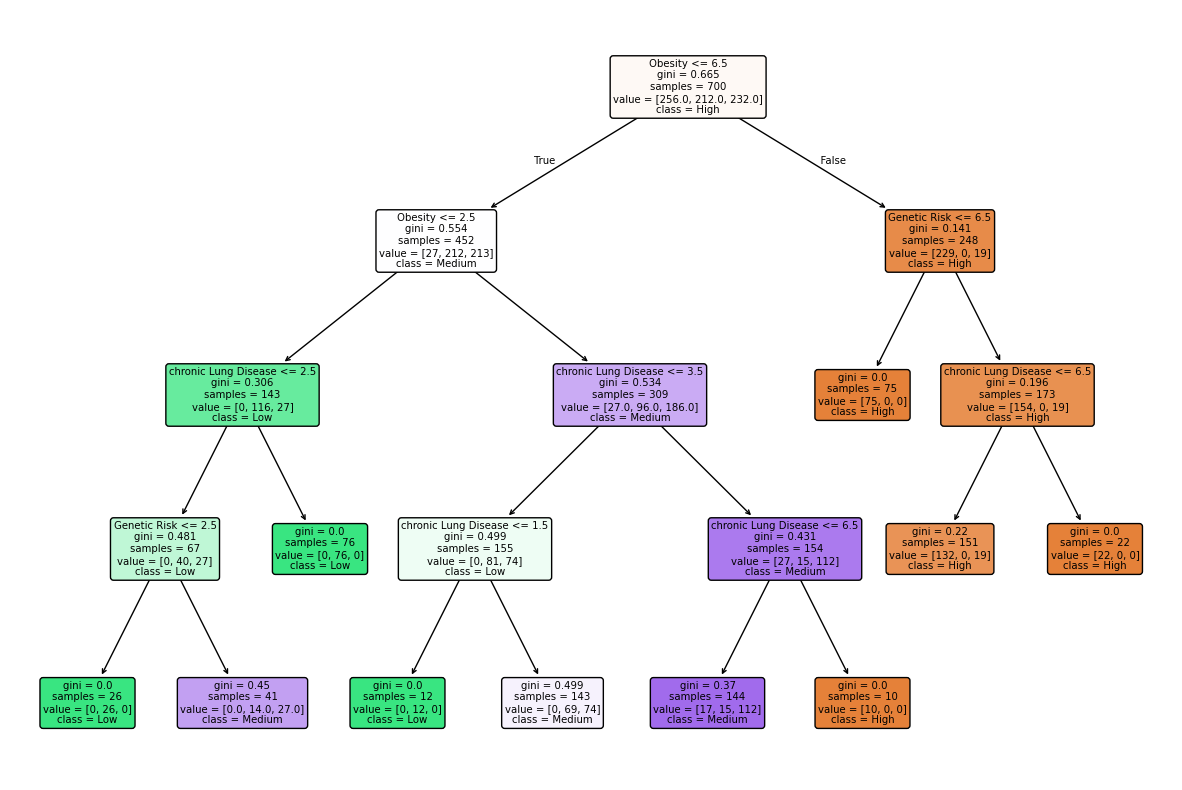

In [31]:
#plot_tree(tree_clf);
plt.figure(figsize=(15,10))
plot_tree(tree_clf, feature_names=X_genetic.columns, class_names=tree_clf.classes_, filled=True, rounded=True)

In [32]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

y_train_pred = cross_val_predict(tree_clf, X_train, y_train, cv=3)

accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 80.14%


# Environmental Features Decision Tree

**Prepare the data**

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

y = patientsDf['Level']
X_environmental = patientsDf[['Air Pollution', 'OccuPational Hazards', 'Passive Smoker']]

X_trainEnv, X_testEnv, y_trainEnv, y_testEnv = train_test_split(X_environmental, y, test_size=0.3, stratify=y, random_state=42)

**Train the model and display tree results**

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

tree_clf_Env = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf_Env.fit(X_trainEnv, y_trainEnv)

DecisionTreeClassifier(max_depth=4, random_state=42)

[Text(0.5, 0.9, 'Passive Smoker <= 6.5\ngini = 0.665\nsamples = 700\nvalue = [256.0, 212.0, 232.0]\nclass = High'),
 Text(0.4230769230769231, 0.7, 'OccuPational Hazards <= 4.5\ngini = 0.582\nsamples = 492\nvalue = [48, 212, 232]\nclass = Medium'),
 Text(0.46153846153846156, 0.8, 'True  '),
 Text(0.15384615384615385, 0.5, 'Passive Smoker <= 1.5\ngini = 0.467\nsamples = 299\nvalue = [0.0, 188.0, 111.0]\nclass = Low'),
 Text(0.07692307692307693, 0.3, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]\nclass = Low'),
 Text(0.23076923076923078, 0.3, 'Air Pollution <= 2.5\ngini = 0.49\nsamples = 258\nvalue = [0, 147, 111]\nclass = Low'),
 Text(0.15384615384615385, 0.1, 'gini = 0.475\nsamples = 121\nvalue = [0, 47, 74]\nclass = Medium'),
 Text(0.3076923076923077, 0.1, 'gini = 0.394\nsamples = 137\nvalue = [0, 100, 37]\nclass = Low'),
 Text(0.6923076923076923, 0.5, 'OccuPational Hazards <= 5.5\ngini = 0.53\nsamples = 193\nvalue = [48, 24, 121]\nclass = Medium'),
 Text(0.5384615384615384, 0.3, 'Air 

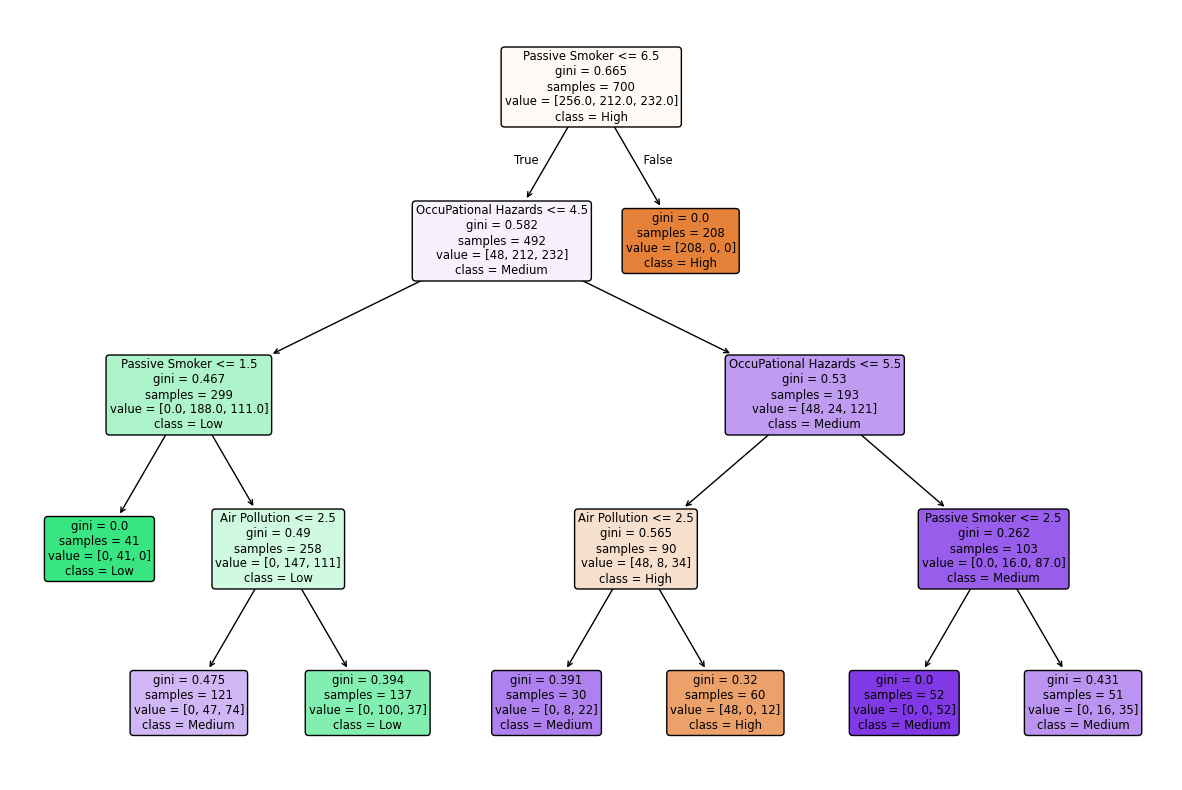

In [ ]:
# plot_tree(tree_clf_Env);
plt.figure(figsize=(15,10))
plot_tree(tree_clf_Env, feature_names=X_environmental.columns, class_names=tree_clf_Env.classes_, filled=True, rounded=True)

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

y_trainEnv_pred = cross_val_predict(tree_clf_Env, X_trainEnv, y_trainEnv, cv=3)

accuracy = accuracy_score(y_trainEnv, y_trainEnv_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 78.14%


# Behavioral Features Decision Tree

**Prepare the data**

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

y = patientsDf['Level']
X_behavioral = patientsDf[['Alcohol use', 'Balanced Diet', 'Smoking']]

X_trainBehav, X_testBehav, y_trainBehav, y_testBehav = train_test_split(X_behavioral, y, test_size=0.3, stratify=y, random_state=42)

**Train the model and display tree results**

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

tree_clf_Behav = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf_Behav.fit(X_trainBehav, y_trainBehav)

DecisionTreeClassifier(max_depth=4, random_state=42)

[Text(0.5333333333333333, 0.9, 'Balanced Diet <= 5.5\ngini = 0.665\nsamples = 700\nvalue = [256.0, 212.0, 232.0]\nclass = High'),
 Text(0.3333333333333333, 0.7, 'Alcohol use <= 4.5\ngini = 0.519\nsamples = 384\nvalue = [8, 196, 180]\nclass = Low'),
 Text(0.43333333333333335, 0.8, 'True  '),
 Text(0.26666666666666666, 0.5, 'Smoking <= 5.5\ngini = 0.496\nsamples = 324\nvalue = [8, 196, 120]\nclass = Low'),
 Text(0.13333333333333333, 0.3, 'Balanced Diet <= 3.5\ngini = 0.49\nsamples = 280\nvalue = [0, 160, 120]\nclass = Low'),
 Text(0.06666666666666667, 0.1, 'gini = 0.499\nsamples = 233\nvalue = [0.0, 122.0, 111.0]\nclass = Low'),
 Text(0.2, 0.1, 'gini = 0.31\nsamples = 47\nvalue = [0, 38, 9]\nclass = Low'),
 Text(0.4, 0.3, 'Alcohol use <= 3.5\ngini = 0.298\nsamples = 44\nvalue = [8, 36, 0]\nclass = Low'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = Low'),
 Text(0.4666666666666667, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0]\nclass = High'),
 

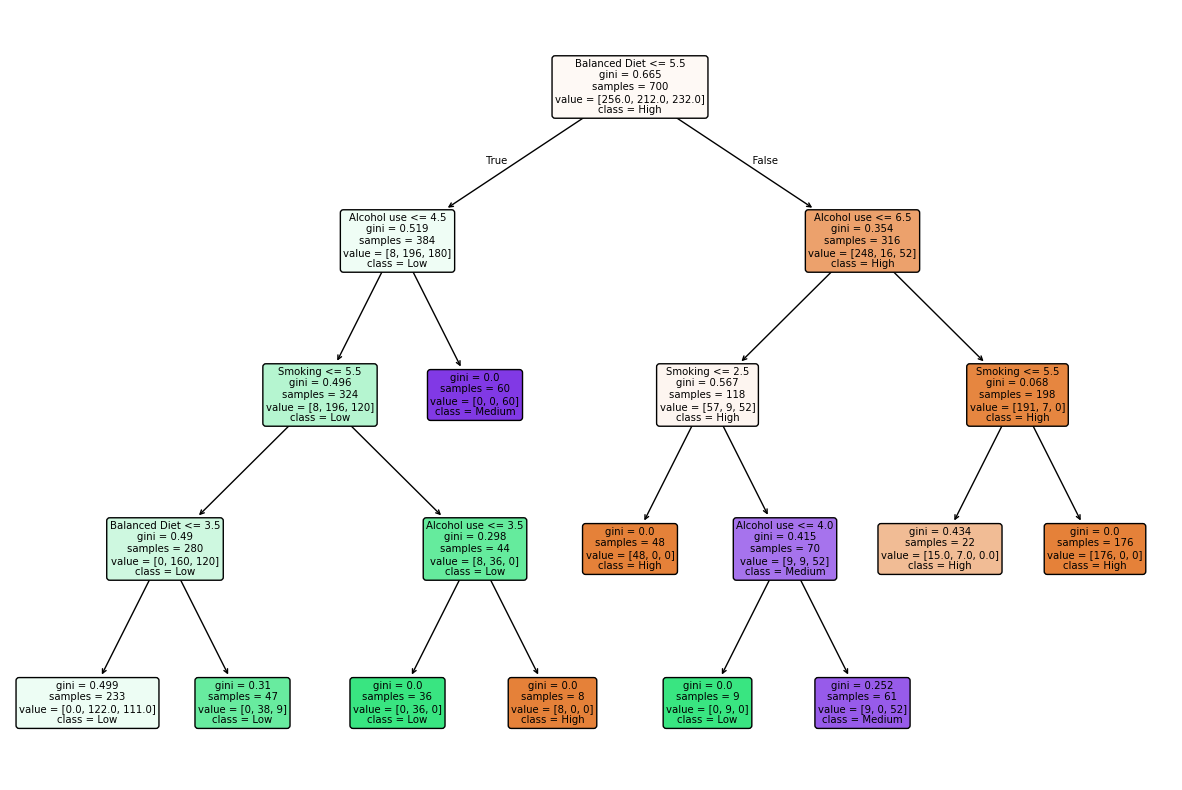

In [ ]:
# plot_tree(tree_clf_Env);
plt.figure(figsize=(15,10))
plot_tree(tree_clf_Behav, feature_names=X_behavioral.columns, class_names=tree_clf_Behav.classes_, filled=True, rounded=True)

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

y_trainBehav_pred = cross_val_predict(tree_clf_Behav, X_trainBehav, y_trainBehav, cv=3)

accuracy = accuracy_score(y_trainBehav, y_trainBehav_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 81.29%


# All Features Decision Tree

We will be using RandomizedSearchCV to determine best parameters to use in our decision tree

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

y = patientsDf['Level']
X = patientsDf.drop(['index', 'Patient Id','Level'], axis=1, errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

#define the parameter space that will be searched over

param_dt = {
    'max_depth': np.arange(3, 16),
    'min_samples_split': [2, 5, 10, 25, 50]
}

search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions=param_dt, cv=5, n_iter=10, random_state=42);
search.fit(X_train, y_train)

print(search.best_params_)

y_trainAll_pred = cross_val_predict(search, X_train, y_train, cv=3)

accuracy = accuracy_score(y_train, y_trainAll_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

search.score(X_test, y_test)

{'min_samples_split': 2, 'max_depth': 15}
Accuracy: 100.00%


1.0

In [ ]:
#display best feature

importances = search.best_estimator_.feature_importances_
feature_names = X_train.columns

#Create a Dataframe for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

print(feature_importance_df.sort_values(by='Importance', ascending=False))


                     Feature  Importance
13         Coughing of Blood    0.412808
17                  Wheezing    0.253587
22                   Snoring    0.127878
9                    Obesity    0.107346
2              Air Pollution    0.069117
19  Clubbing of Finger Nails    0.029263
21                 Dry Cough    0.000000
20             Frequent Cold    0.000000
18     Swallowing Difficulty    0.000000
16       Shortness of Breath    0.000000
15               Weight Loss    0.000000
14                   Fatigue    0.000000
0                        Age    0.000000
12                Chest Pain    0.000000
1                     Gender    0.000000
10                   Smoking    0.000000
8              Balanced Diet    0.000000
7       chronic Lung Disease    0.000000
6               Genetic Risk    0.000000
5       OccuPational Hazards    0.000000
4               Dust Allergy    0.000000
3                Alcohol use    0.000000
11            Passive Smoker    0.000000


**Display the decision Tree**

[Text(0.5, 0.9166666666666666, 'Coughing of Blood <= 5.5\ngini = 0.665\nsamples = 700\nvalue = [256.0, 212.0, 232.0]\nclass = High'),
 Text(0.3333333333333333, 0.75, 'Wheezing <= 4.5\ngini = 0.519\nsamples = 414\nvalue = [8, 200, 206]\nclass = Medium'),
 Text(0.41666666666666663, 0.8333333333333333, 'True  '),
 Text(0.25, 0.5833333333333334, 'Snoring <= 4.5\ngini = 0.371\nsamples = 261\nvalue = [8, 200, 53]\nclass = Low'),
 Text(0.16666666666666666, 0.4166666666666667, 'Obesity <= 4.5\ngini = 0.169\nsamples = 220\nvalue = [8, 200, 12]\nclass = Low'),
 Text(0.08333333333333333, 0.25, 'gini = 0.0\nsamples = 200\nvalue = [0, 200, 0]\nclass = Low'),
 Text(0.25, 0.25, 'Coughing of Blood <= 4.0\ngini = 0.48\nsamples = 20\nvalue = [8, 0, 12]\nclass = Medium'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0]\nclass = High'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 12]\nclass = Medium'),
 Text(0.3333333

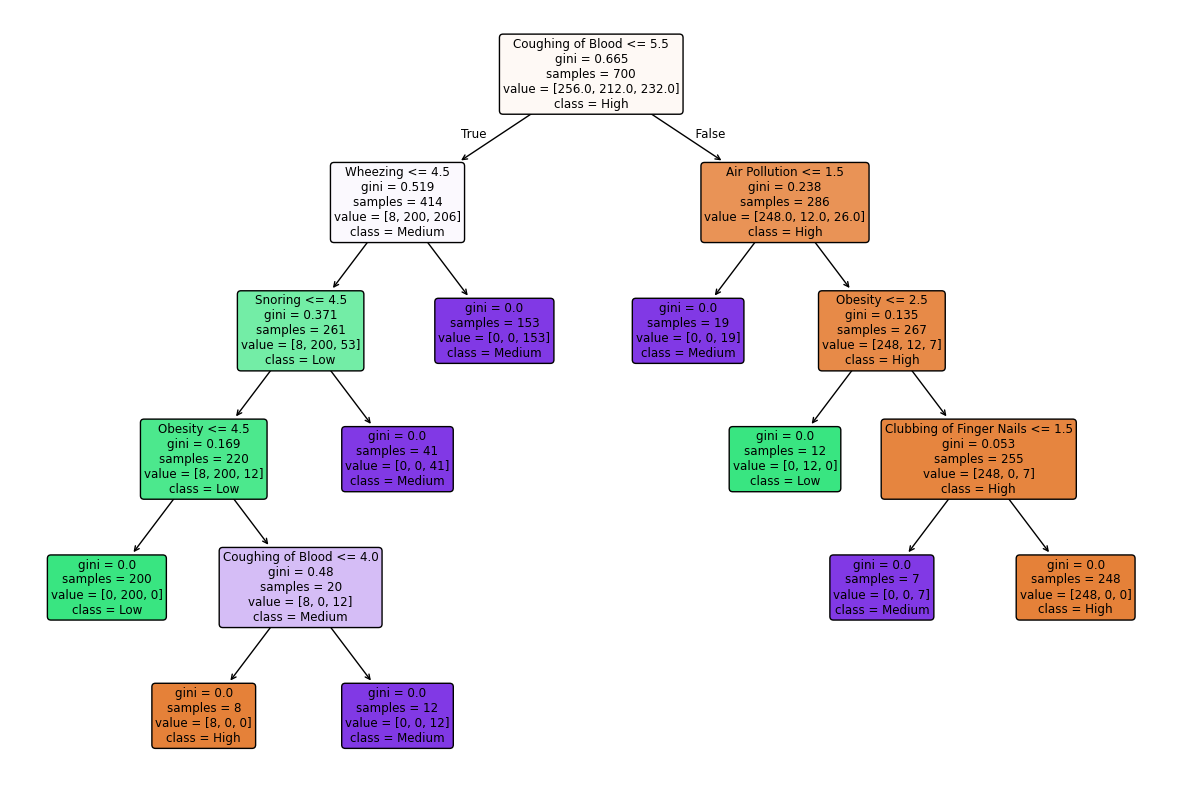

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(search.best_estimator_, feature_names=X.columns, class_names=search.classes_, filled=True, rounded=True)

# Summary and Final Remarks

- when looking into predections from feture category perspective, it seams that behavioral factors is more deterministic than gentic and environmental causes (at least this is what the data shows!).

- notice how passive smoker feature is at root of the environmental factors tree and more significant than air pollution when it relates to lung cancer

- notice how obesity is at root of the genetic and medical history factors tree and more significant than genetic factor feature itself when it relates to lung cancer

- we decided to consider the behavioral elements the more prevailing factor with relation to answering questions on the level of cancer predections, this becuase the decision tree gave more acuracy then the orther factors, and it's branching is simpler and more interpratable

- as per the whole features decision tree, we utilized Randomized search to figure which hyper parameter to set and which feature are more important in classifying our data and reached accuracy of 100%